# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [261]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(style="darkgrid", font_scale=1.3, palette="Set2")

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Закомментируйте строку ниже для запуска локально
# from coin import coin

# Для запуска локально используйте:

import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs


def uniform(size=1, precision=30):
    if type(size) is int:
        return np.sum(
            coin((size, precision))
            * np.tile(2.0 ** np.arange(-precision, 0), (size, 1)),
            axis=1,
        )
    return np.sum(
        coin(size + (precision,))
        * np.tile(2.0 ** np.arange(-precision, 0), size + (1,)),
        axis=len(size),
    )


def normal(size=1, loc=0, scale=1, precision=30):
    return loc + scale * np.sqrt(-2 * np.log(uniform(size, precision))) * np.cos(
        2 * uniform(size, precision) * np.pi
    )


def expon(size=1, lambd=1, precision=30):
    return -np.log(uniform(size, precision)) / lambd


**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

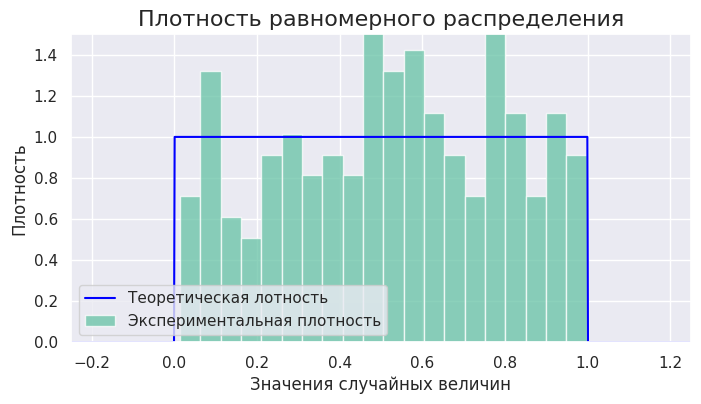

In [170]:
with sns.plotting_context("notebook"):
    fig = plt.figure(figsize=(8, 4))

    x = np.linspace(-0.25, 1.25, 1000)

    plt.plot(
        x,
        sps.uniform.pdf(x, loc=0, scale=1),
        label="Теоретическая лотность",
        color="blue",
    )
    plt.hist(
        np.random.uniform(0, 1, 200),
        bins=20,
        density=True,
        alpha=0.75,
        label="Экспериментальная плотность",
    )

    plt.xlim((-0.25, 1.25))
    plt.ylim((0, 1.5))
    plt.title("Плотность равномерного распределения", fontsize="16")
    plt.xlabel("Значения случайных величин")
    plt.ylabel("Плотность")
    plt.legend(loc="lower left")
    plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

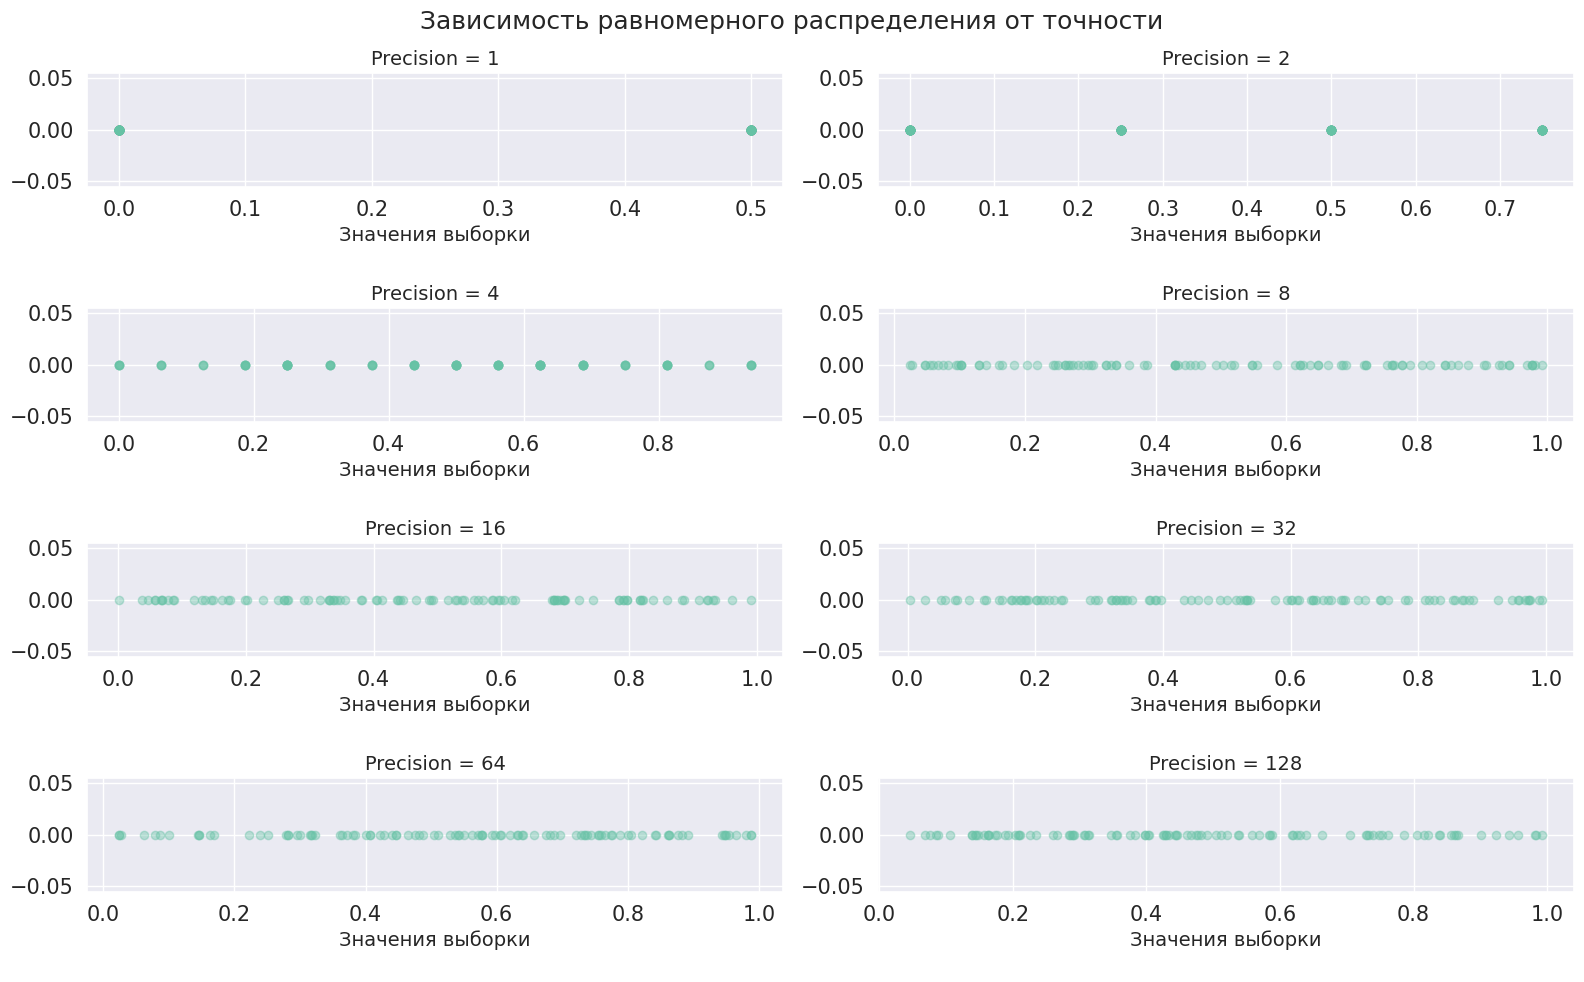

In [189]:
coin = sps.bernoulli(p=0.5).rvs


def uniform(size=1, precision=30):
    if type(size) is int:
        return np.sum(
            coin((size, precision))
            * np.tile(2.0 ** np.arange(-precision, 0), (size, 1)),
            axis=1,
        )
    return np.sum(
        coin(size + (precision,))
        * np.tile(2.0 ** np.arange(-precision, 0), size + (1,)),
        axis=len(size),
    )


with sns.plotting_context("notebook"):
    plt.figure(figsize=(16, 10))
    plt.suptitle("Зависимость равномерного распределения от точности", fontsize="18")

    for i, precision in enumerate([1, 2, 4, 8, 16, 32, 64, 128]):
        plt.subplot(4, 2, i + 1)

        plt.scatter(uniform(100, precision), np.zeros(100), alpha=0.4)

        plt.tick_params(axis="x", labelsize=15)
        plt.tick_params(axis="y", labelsize=15)

        plt.title("Precision = " + str(precision), fontsize="14")
        plt.xlabel("Значения выборки\n", fontsize="14")

    plt.tight_layout()

Видно, что и при малых precision распределение равномерно. Но с ростом точности это становится еще нагляднее.

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

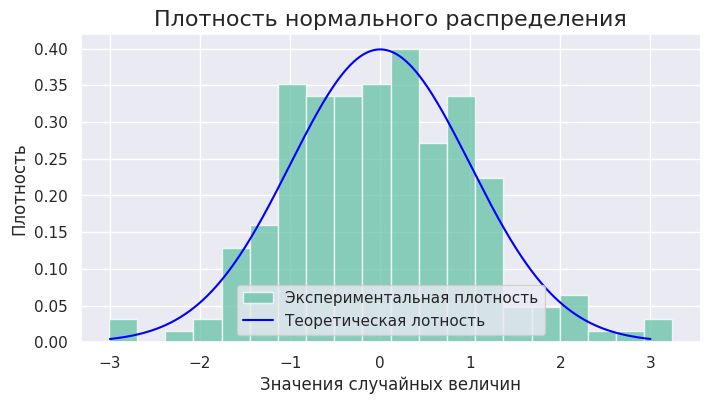

In [159]:
with sns.plotting_context("notebook"):
    plt.figure(figsize=(8, 4))
    x = np.linspace(-3, 3, 1000)
    plt.hist(
        np.random.normal(0, 1, 200),
        bins=20,
        density=True,
        alpha=0.75,
        label="Экспериментальная плотность",
    )
    plt.plot(
        x, sps.norm.pdf(x, loc=0, scale=1), label="Теоретическая лотность", color="blue"
    )
    plt.title("Плотность нормального распределения", fontsize="16")
    plt.xlabel("Значения случайных величин")
    plt.ylabel("Плотность")
    plt.legend()
    plt.show()

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

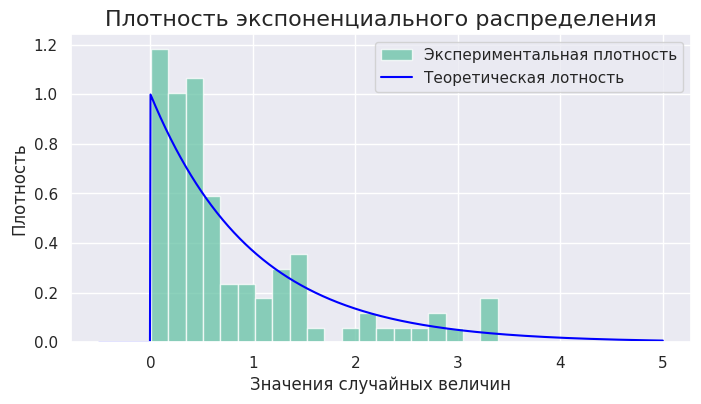

In [168]:
with sns.plotting_context("notebook"):
    plt.figure(figsize=(8, 4))
    x = np.linspace(-0.5, 5, 1000)
    plt.hist(
        sps.expon.rvs(size=100, scale=1),
        bins=20,
        density=True,
        alpha=0.75,
        label="Экспериментальная плотность",
    )
    plt.plot(x, sps.expon.pdf(x, scale=1), label="Теоретическая лотность", color="blue")
    plt.title("Плотность экспоненциального распределения", fontsize="16")
    plt.xlabel("Значения случайных величин")
    plt.ylabel("Плотность")
    plt.legend()
    plt.show()

**Выводы:**

Итак, как мы видим из графиков, теоретически вычисленные плотности действительно близки к экспериментальным значениям.

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графике плотности нормального распределения и распределения Коши. Что можно сказать?

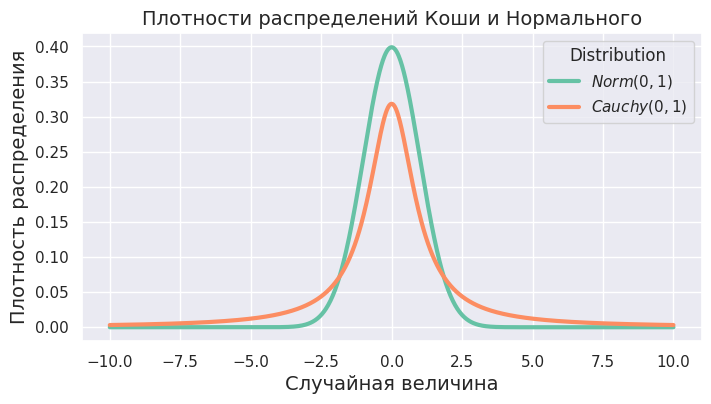

In [33]:
with sns.plotting_context("notebook"):
    plt.figure(figsize=(8, 4))
    grid = np.linspace(-10, 10, 1000)

    plt.plot(grid, sps.norm.pdf(grid), label="$Norm(0, 1)$", lw=3)
    plt.plot(grid, sps.cauchy.pdf(grid), label="$Cauchy(0, 1)$", lw=3)

    plt.xlabel("Случайная величина", fontsize=14)
    plt.ylabel("Плотность распределения", fontsize=14)
    plt.title("Плотности распределений Коши и Нормального", fontsize=14)

    plt.legend(title="Distribution")

    plt.show()

Как видим, у нормального распределения плотность выше в близи нуля, а хвосты быстрее убывают. Грубо говоря поэтому у распределения Коши нет матожидания.

**2.** Повторите эксперимент с занятия про закон больших чисел для распределения Коши. Выполняется ли закон? 

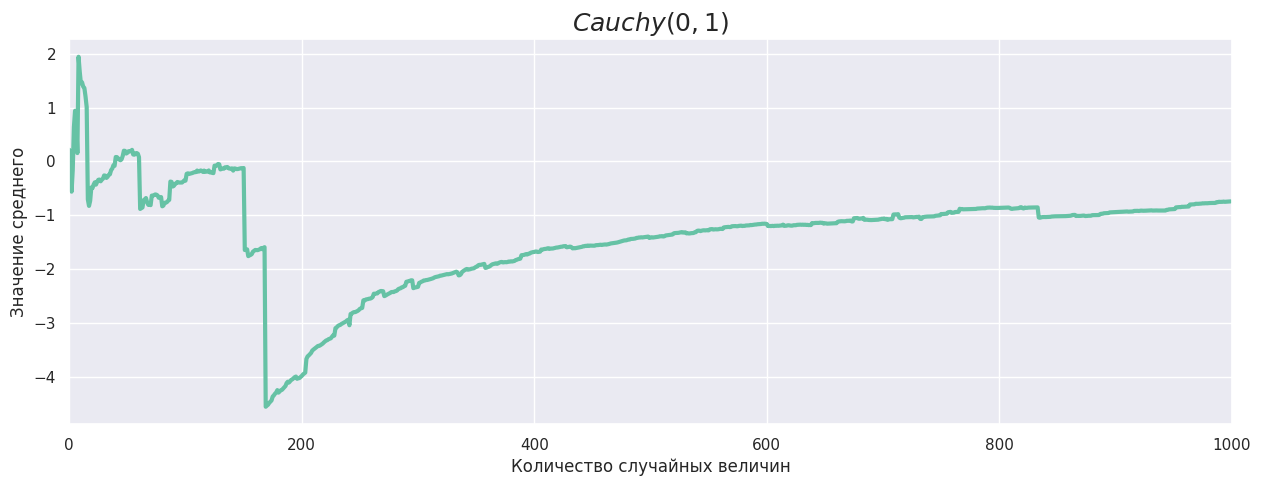

In [38]:
size = 1000  # количество случайных величин
samples = sps.cauchy(loc=0, scale=1).rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)

with sns.plotting_context("notebook"):
    plt.figure(figsize=(15, 5))
    plt.plot(cum_means, lw=3)

    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение среднего")
    plt.title("$Cauchy(0, 1)$", fontsize=18)

    plt.xlim((0, size));

Но одного эксперимента мало, чтобы понять свойства вероятностных объектов. Повторим эксперимент 10 раз независимо.

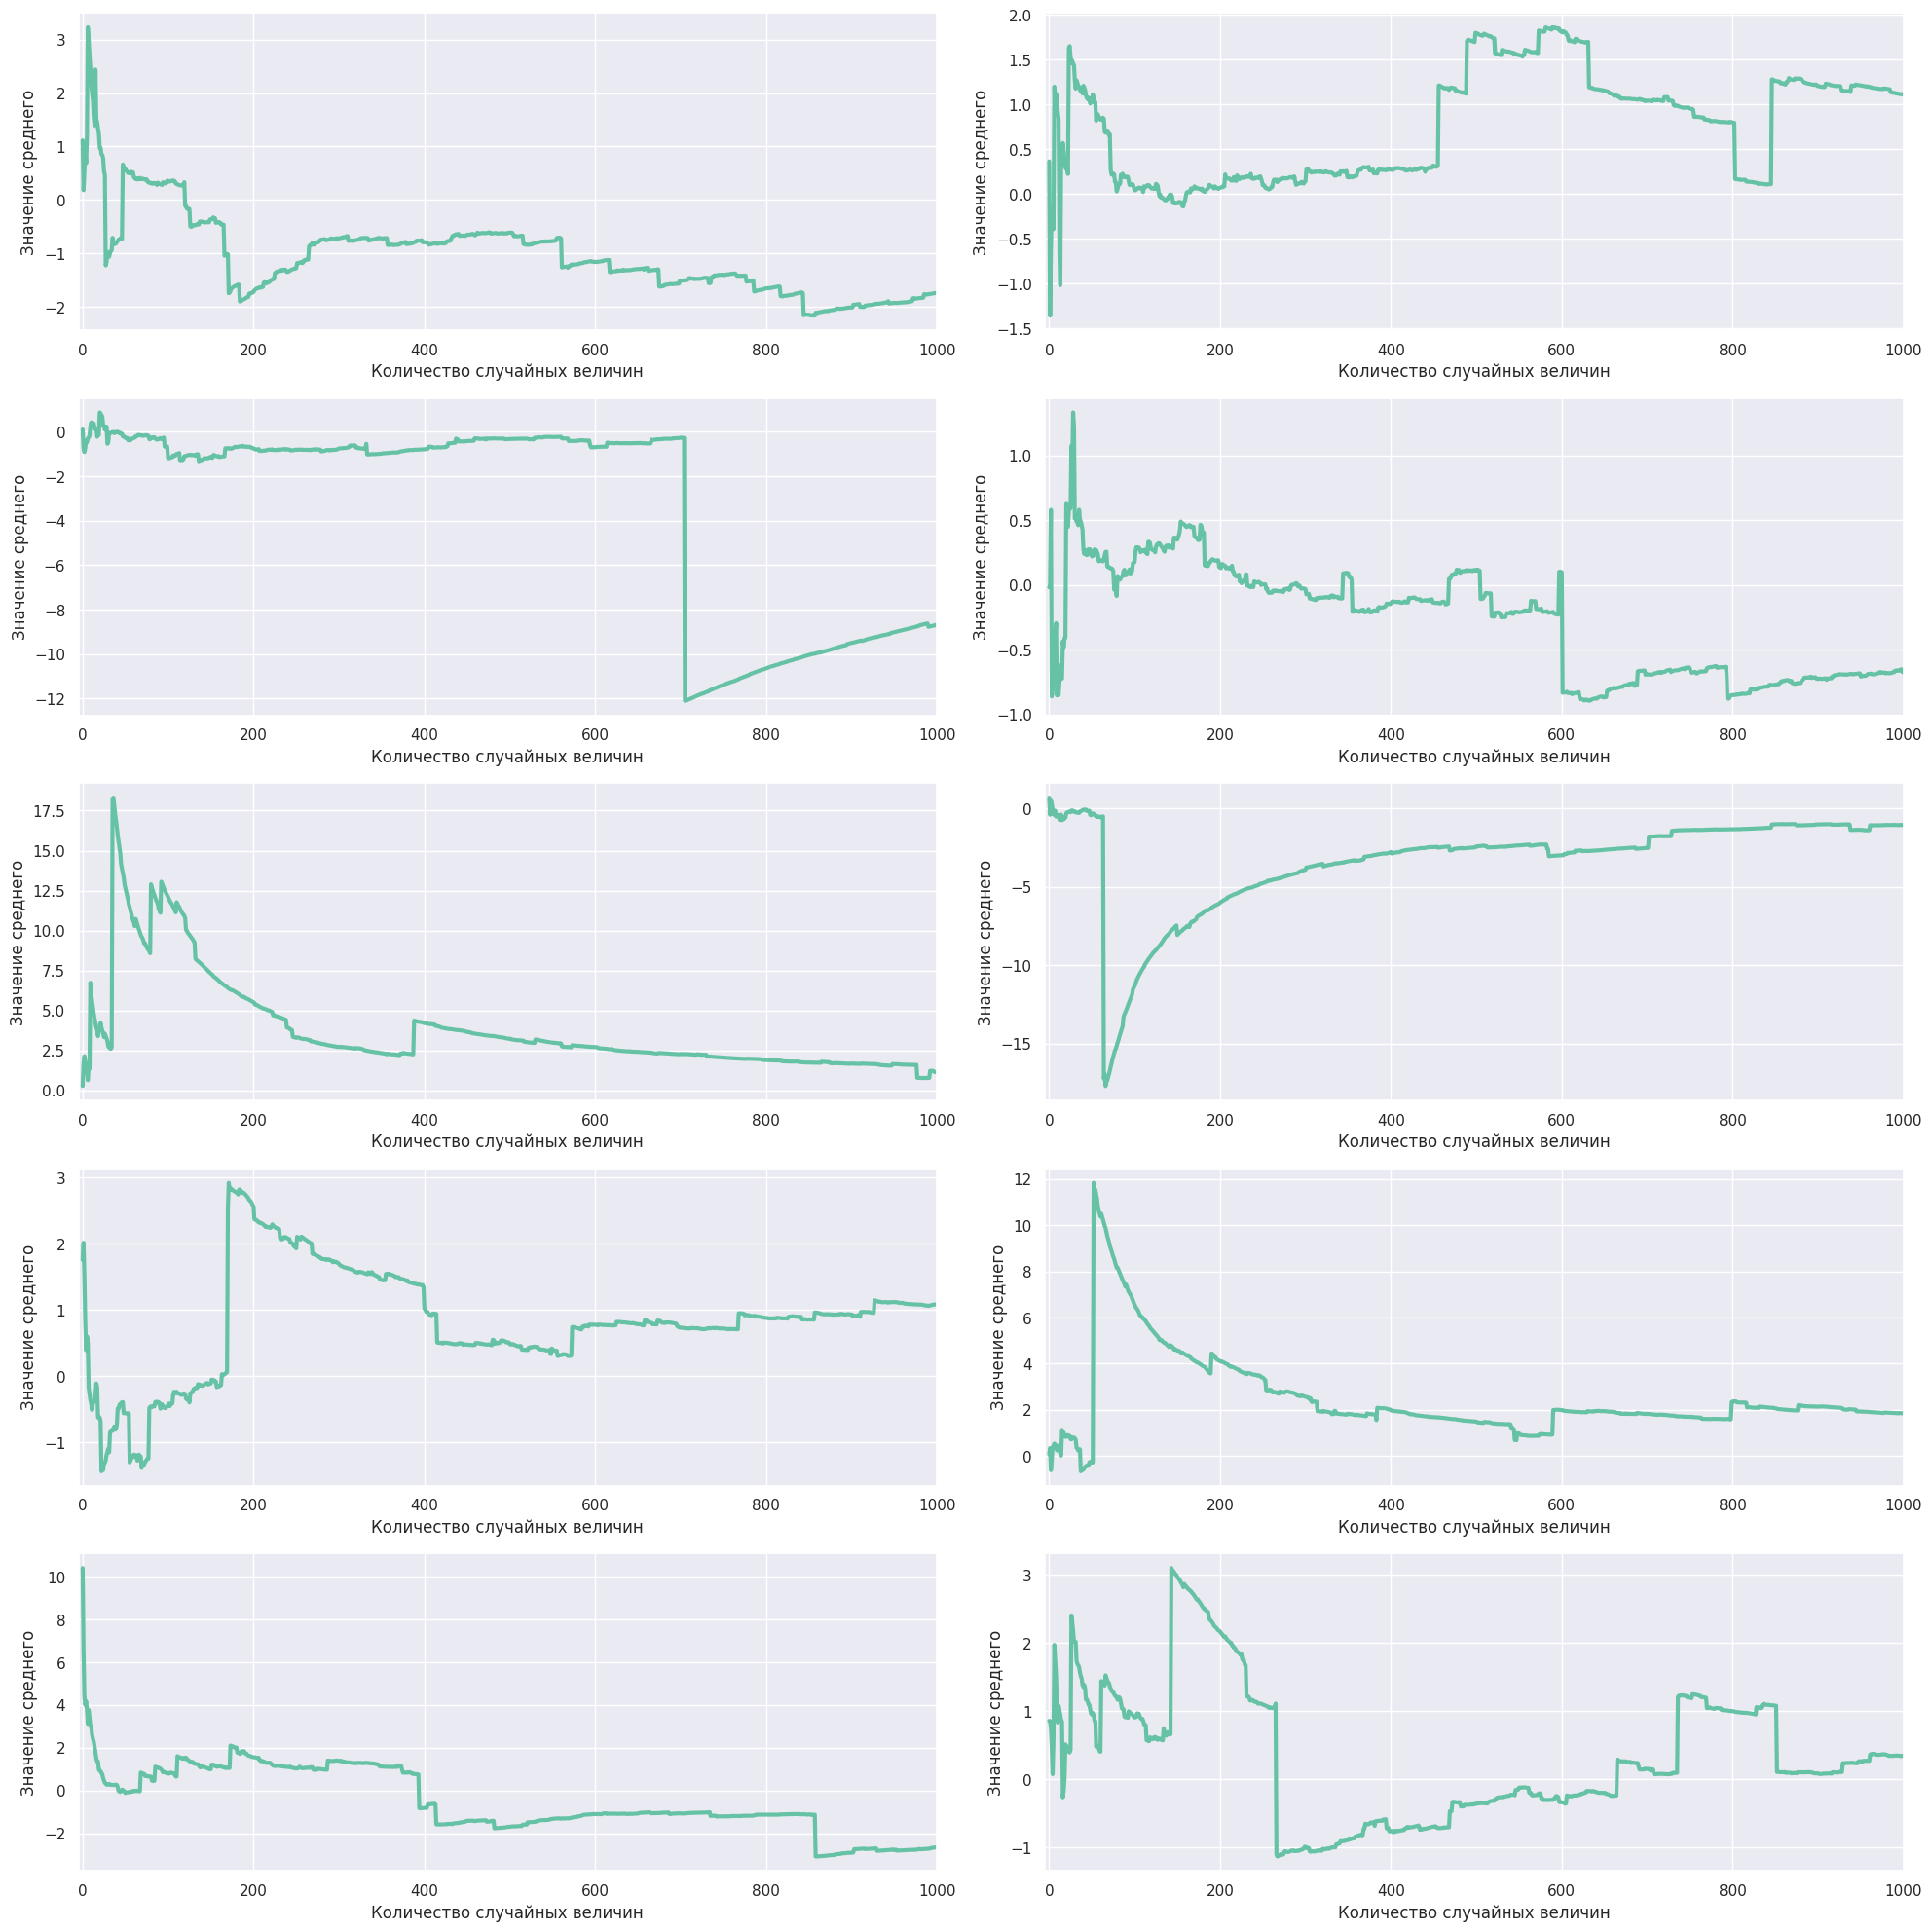

In [41]:
with sns.plotting_context("notebook"):
    plt.figure(figsize=(20, 20))

    # эксперименты
    for i in range(10):

        # Генерация выборки и вычисление средних
        samples = sps.cauchy(loc=0, scale=1).rvs(size=size)
        cum_means = samples.cumsum() / (np.arange(size) + 1)

        # График
        plt.subplot(5, 2, i + 1)
        plt.plot(cum_means, lw=3)

        plt.xlabel("Количество случайных величин")
        plt.ylabel("Значение среднего")

        plt.xlim((-5, size))

    plt.tight_layout()

Сгенерируем большое количество независимых наборов случайных величин и нарисуем их всех одним цветом.

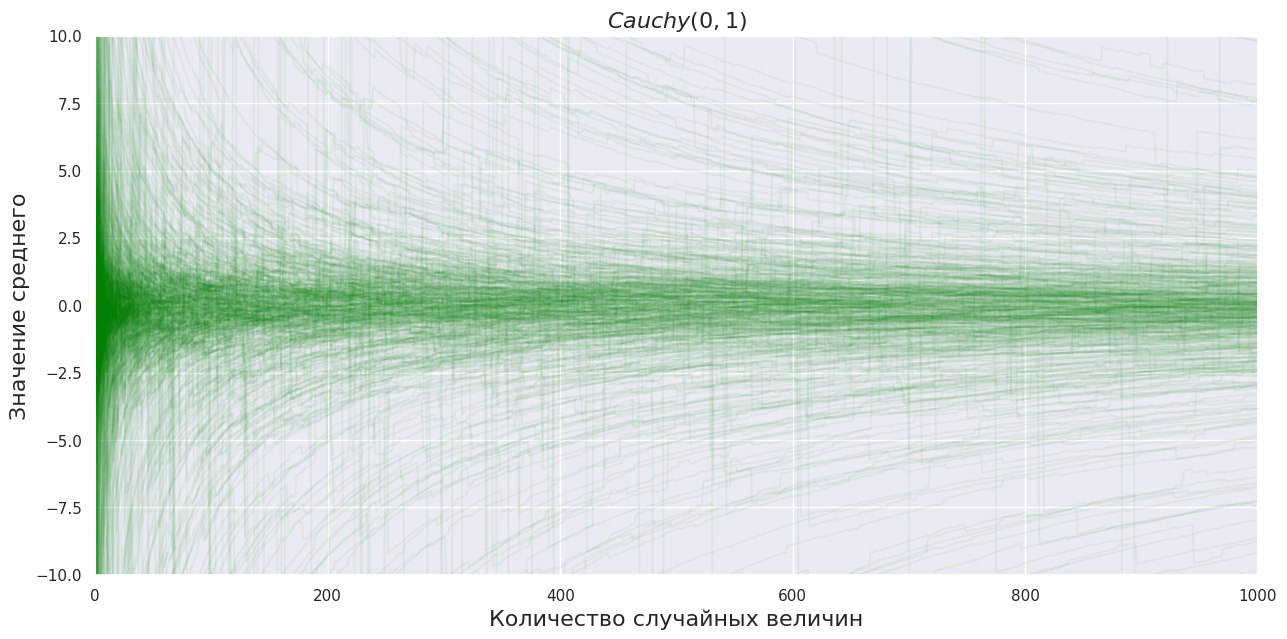

In [102]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy(loc=0, scale=1).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

with sns.plotting_context("notebook"):
    plt.figure(figsize=(15, 7))

    # рисуем для каждой выборки отдельно
    for i in range(samples_count):
        plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.05)

    plt.xlabel("Количество случайных величин", fontsize=16)
    plt.ylabel("Значение среднего", fontsize=16)
    plt.title("$Cauchy(0, 1)$", fontsize=16)
    plt.xlim((0, size))
    plt.ylim((-10, 10))

Уже видно, что среднее так охотно к нулю не стремится. Сравним с Нормальным, Экспоненциальным и Пуассоновским распределеними:

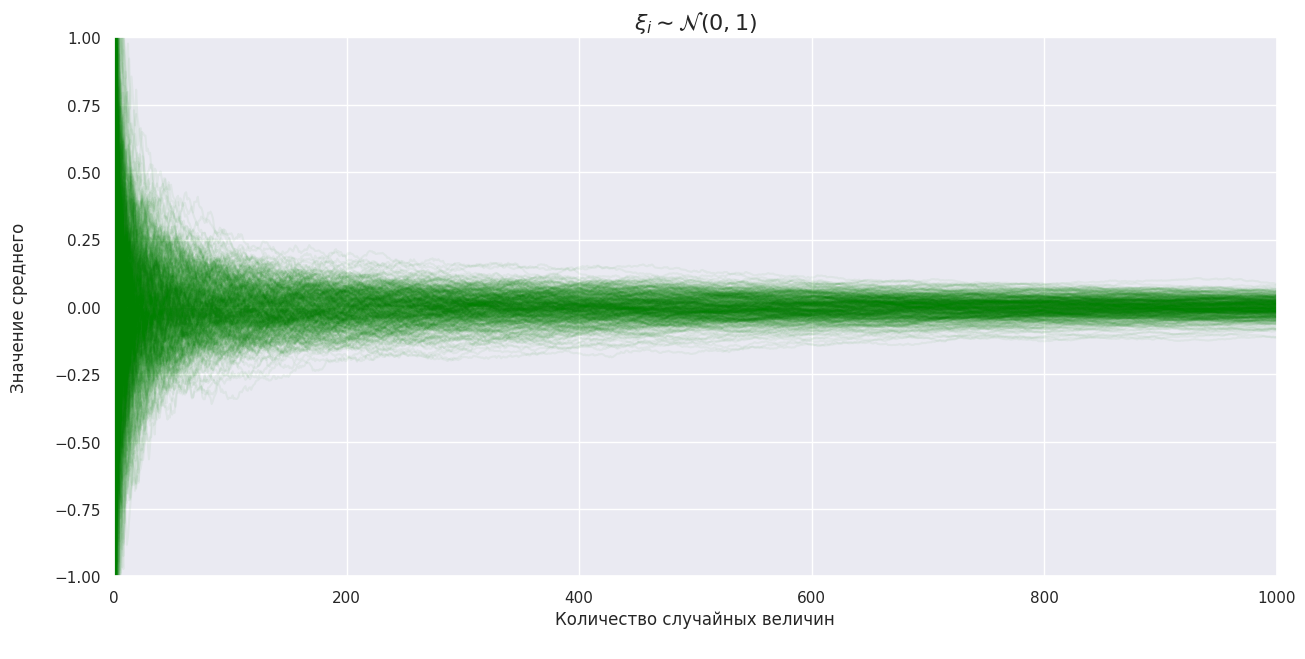

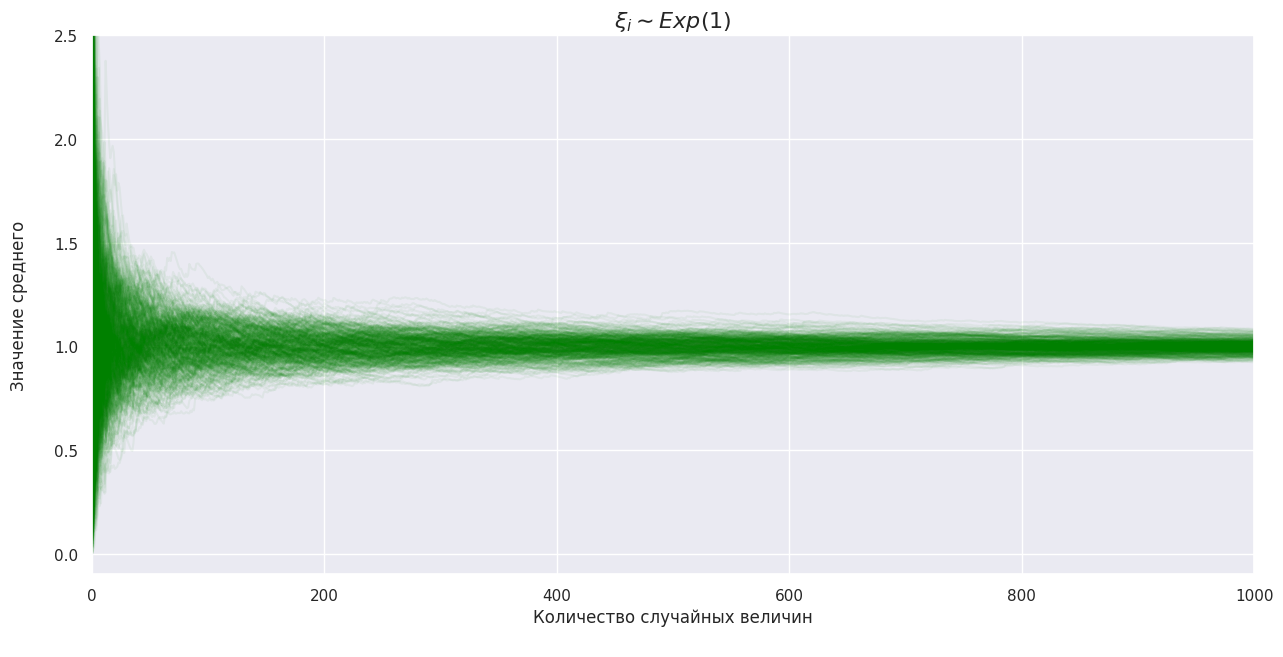

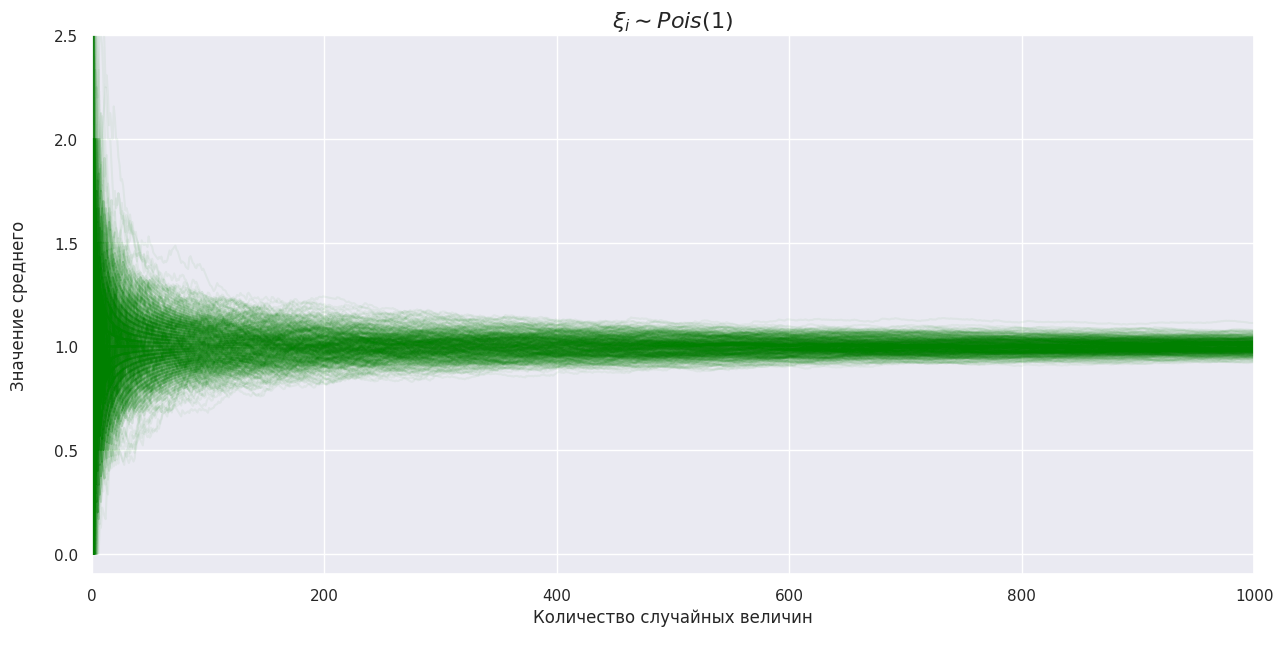

In [84]:
size = 1000
samples_count = 500

with sns.plotting_context("notebook"):
    for distr, ylim, label in zip(
        [sps.norm(), sps.expon(), sps.poisson(mu=1)],
        [(-1, 1), (-0.1, 2.5), (-0.1, 2.5)],
        ["$\\mathcal{N}(0, 1)$", "$Exp(1)$", "$Pois(1)$"],
    ):

        # Генерация выборки и вычисление средних
        samples = distr.rvs(size=(samples_count, size))
        cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

        # График
        plt.figure(figsize=(15, 7))
        for i in range(samples_count):
            plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.05)
        plt.title("$\\xi_i \\sim " + label[1:], fontsize=16)
        plt.xlabel("Количество случайных величин\n")
        plt.ylabel("Значение среднего\n")
        plt.xlim((0, size))
        plt.ylim(ylim)
        plt.show()

Из графиков становится наглядно, что для случайных велчин со стандартным распределением Коши среднее стримиться к нулю не будет.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

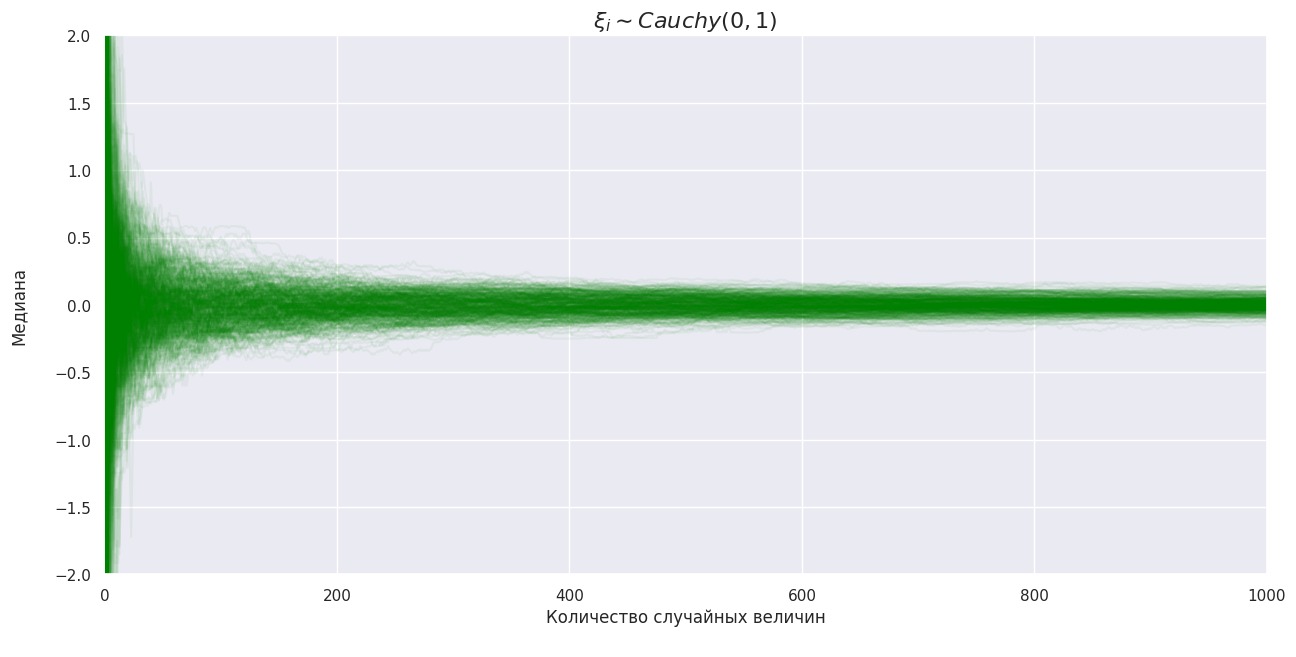

In [100]:
def cumulative_median(data):
    """Функция для расчета кумулятивной медианы массива."""
    cum_median = np.zeros(len(data))
    for i in range(len(data)):
        cum_median[i] = np.median(data[: i + 1])
    return cum_median


size = 1000
samples_count = 500

samples = sps.cauchy().rvs(size=(samples_count, size))

with sns.plotting_context("notebook"):
    plt.figure(figsize=(15, 7))

    for i in range(samples_count):
        plt.plot(
            np.arange(size) + 1,
            cumulative_median(samples[i]),
            color="green",
            alpha=0.05,
        )
    plt.title("$\\xi_i \\sim " + "Cauchy(0, 1)$", fontsize=16)
    plt.xlabel("Количество случайных величин\n")
    plt.ylabel("Медиана\n")
    plt.xlim((0, size))
    plt.ylim((-2, 2));

Медиана же стандартного распределения Коши к нулю, как мы видим из графика, стремится.

**Вывод:**

Итак, сравнение с другими распределениями, для которых выполнен ЗБЧ, показало, что среднее для стандартного распределения Коши не будет стремиться к нулю. А вот медиана, как показывает последнией график, будет.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Найдем значение n.

In [206]:
size = 1000
k = 500

samples = sps.bernoulli(0.5).rvs(size=(k, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

F = abs(cum_means - 0.5).sum(axis=0) / k
n = np.where(F <= 0.02)[0][0]
n

398

Визуализируем зависимость.

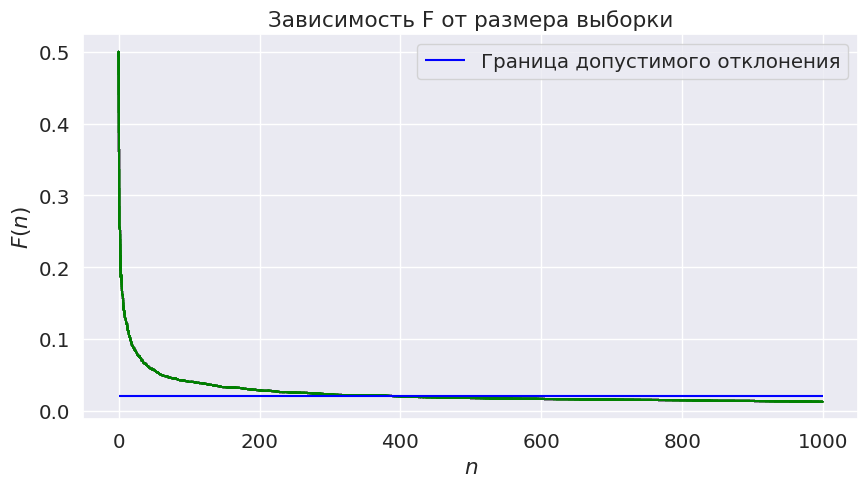

In [207]:
plt.figure(figsize=(10, 5))

for i in range(100):
    plt.plot(np.arange(size), F, color="green", alpha=0.05)

plt.hlines(0.02, 0, size, color="blue", label="Граница допустимого отклонения")

plt.title("Зависимость F от размера выборки")
plt.xlabel("$n$")
plt.ylabel("$F(n)$")

plt.legend()
plt.show()

Нет необходимсоти строить в логарифмическом масштабе, так как видна обратная зависимость (похоже на гиперболу).

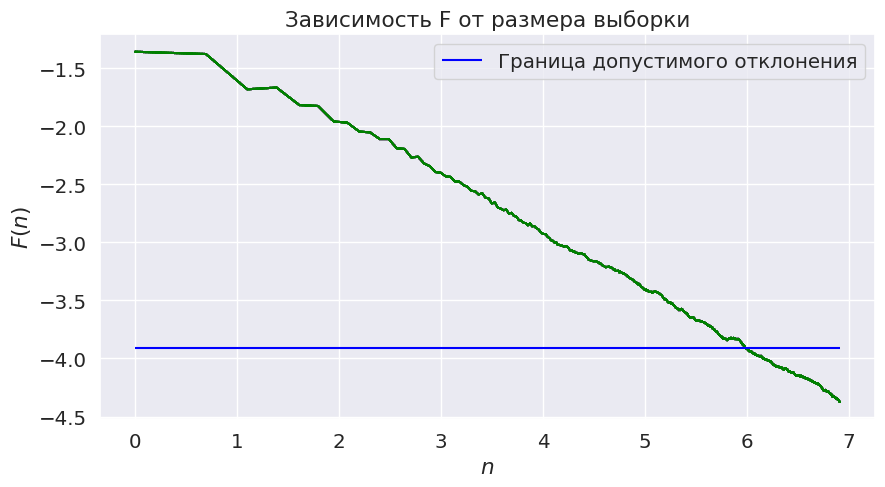

In [217]:
plt.figure(figsize=(10, 5))

for i in range(100):
    plt.plot(np.log(np.arange(1, size)), np.log(F[1:]), color="green", alpha=0.05)

plt.hlines(
    np.log(0.02), 0, np.log(size), color="blue", label="Граница допустимого отклонения"
)

plt.title("Зависимость F от размера выборки")
plt.xlabel("$n$")
plt.ylabel("$F(n)$")

plt.legend()
plt.show()

In [215]:
np.exp(6)

403.4287934927351

Итак, график тоже показал значение, близкое к изначально определенному (n=398)

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

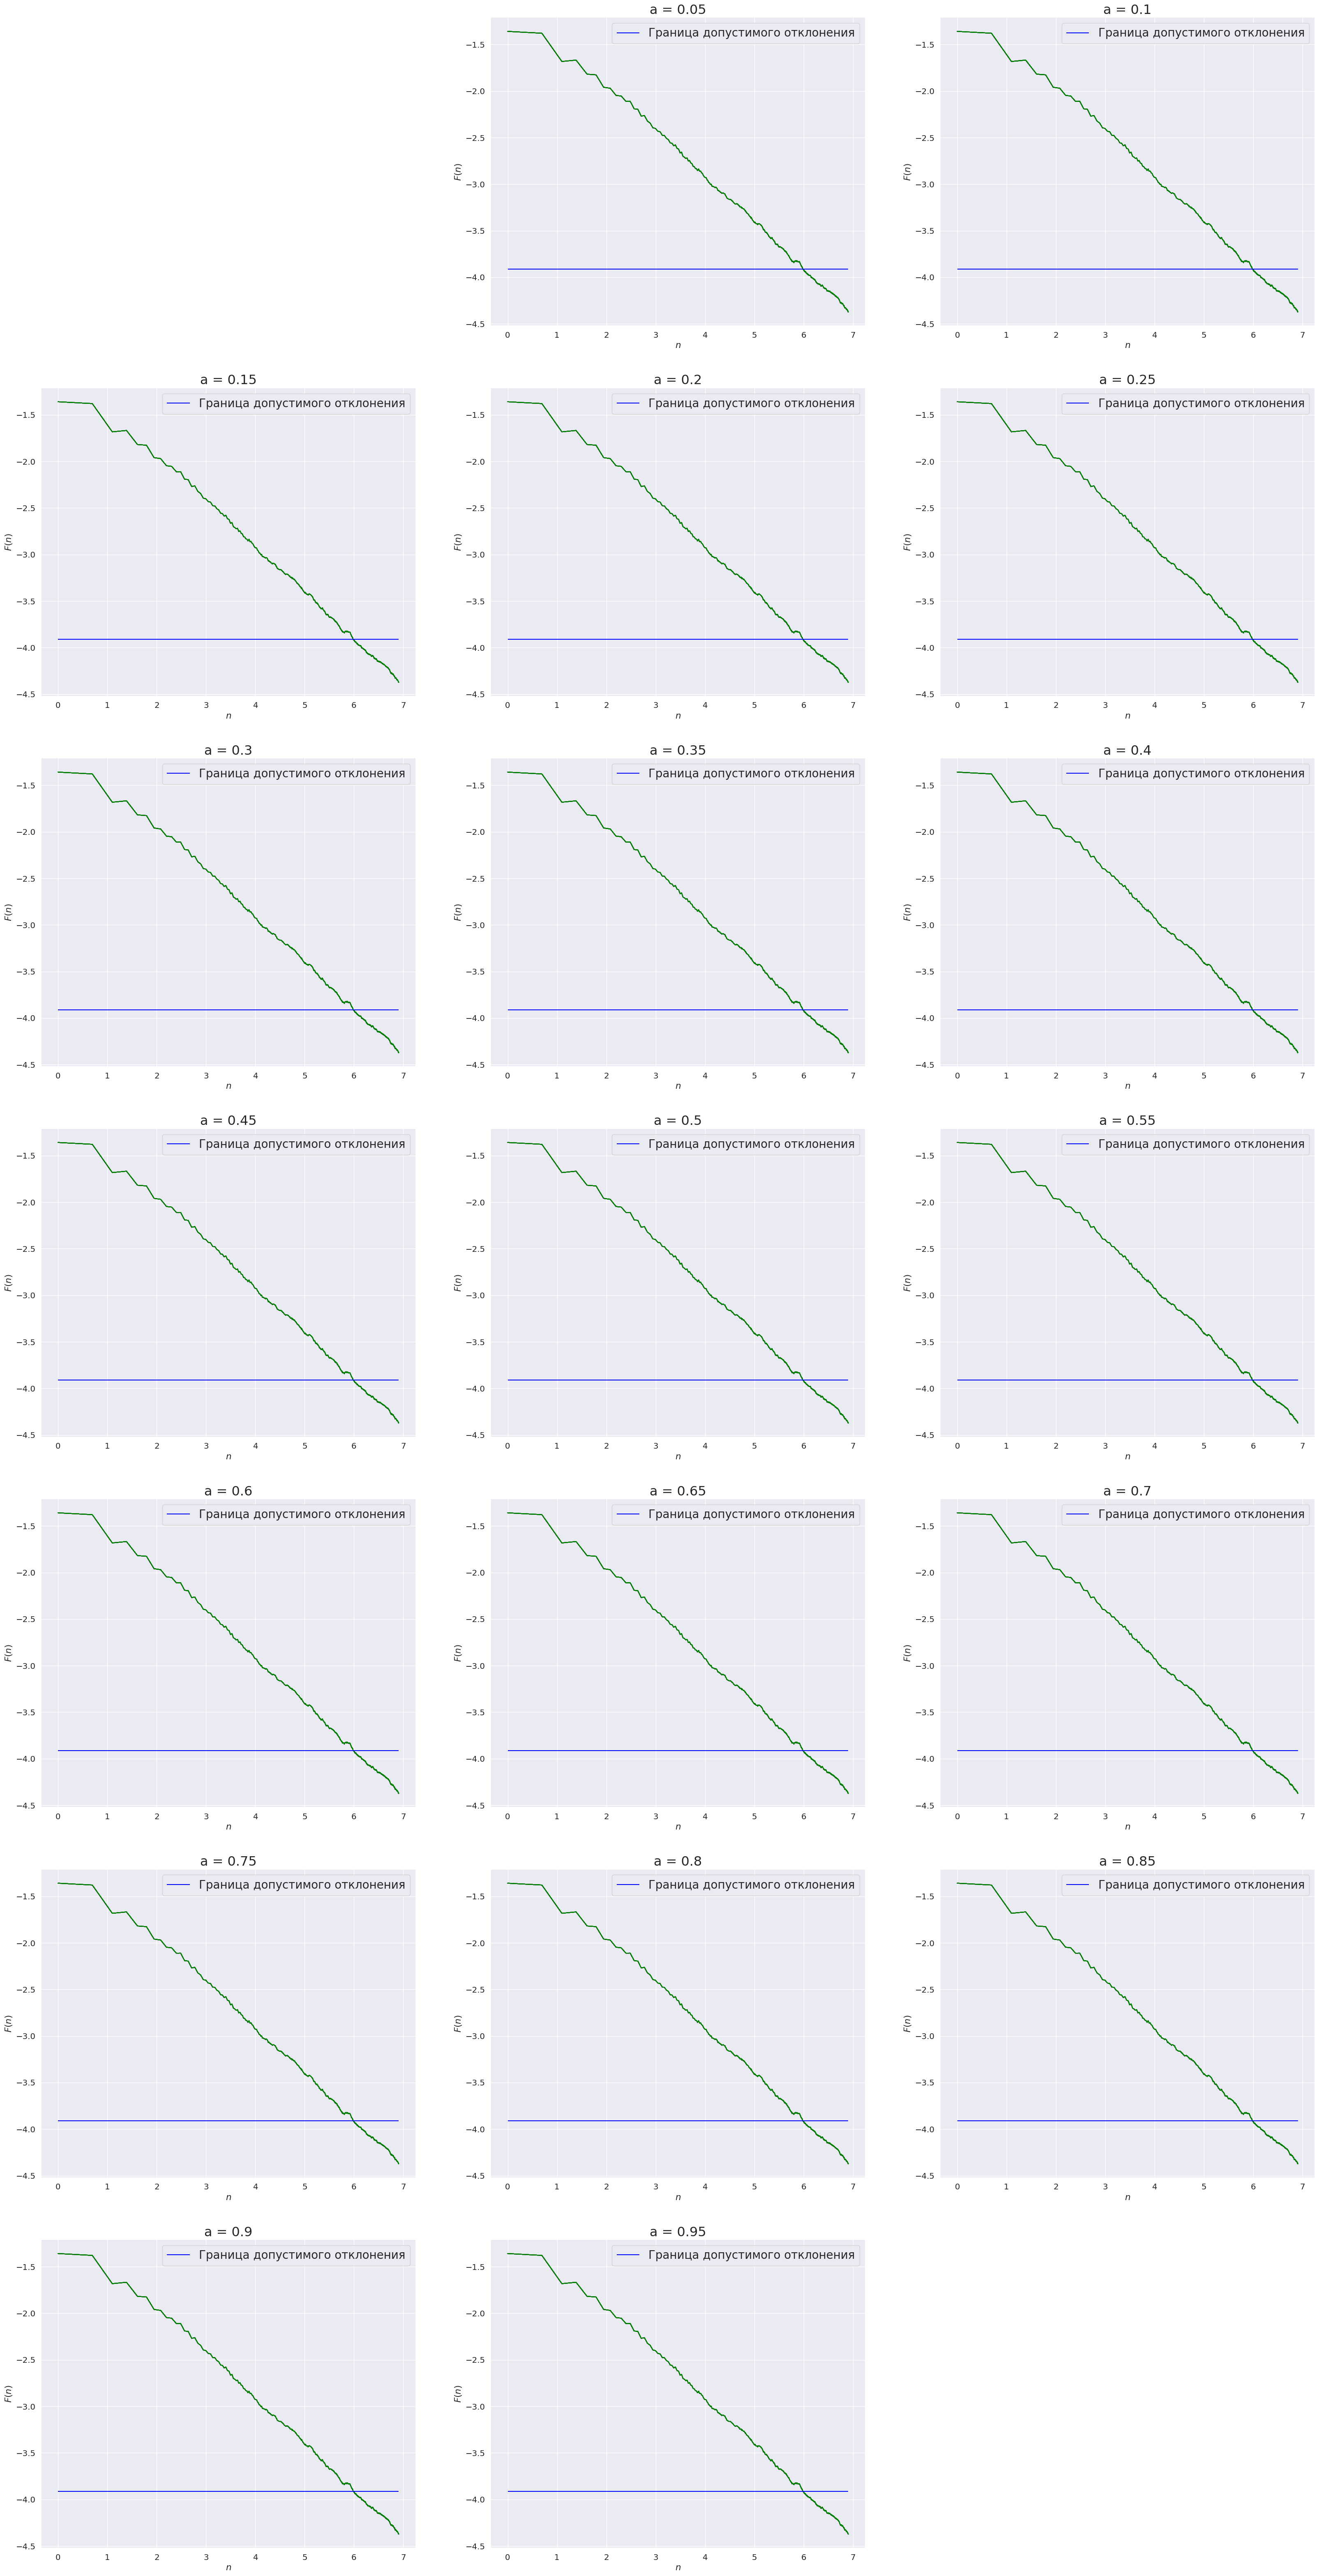

In [231]:
plt.figure(figsize=(40, 80))
sample_size = dict()

for a in np.arange(0.05, 1, 0.05):
    plt.subplot(7, 3, int(a * 20) + 1)
    samples = sps.bernoulli(a).rvs(size=(k, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)
    F_a = abs(cum_means - a).sum(axis=0) / k
    sample_size[a] = np.where(F_a <= 0.02)[0][0]

    for i in range(100):
        plt.plot(np.log(np.arange(1, size)), np.log(F[1:]), color="green", alpha=0.05)

    plt.hlines(
        np.log(0.02),
        0,
        np.log(size),
        color="blue",
        label="Граница допустимого отклонения",
    )

    plt.xlabel("$n$")
    plt.ylabel("$F(n)$")
    plt.title("a = " + str(round(a, 2)), fontsize=23)

    plt.legend(fontsize=20)

Визуализируем теперь зависимость необходимого размера выборки n от значения a.

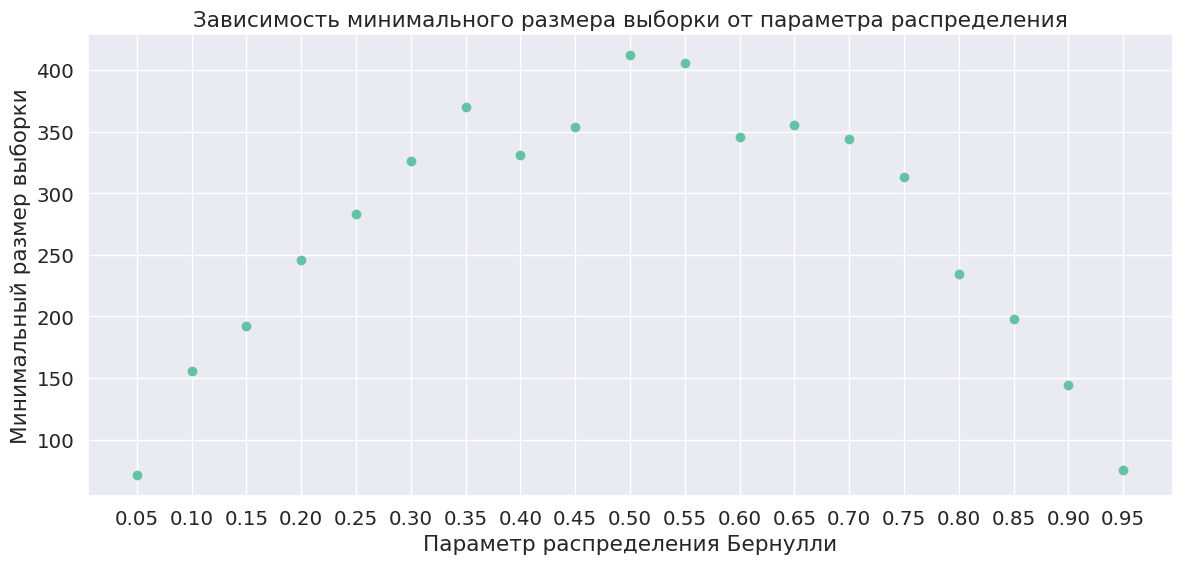

In [260]:
plt.figure(figsize=(14, 6))
plt.scatter(x=sample_size.keys(), y=sample_size.values())

plt.xticks(np.arange(0.05, 1, 0.05))

plt.title("Зависимость минимального размера выборки от параметра распределения")
plt.xlabel("Параметр распределения Бернулли")
plt.ylabel("Минимальный размер выборки");

Итак, видим, что наибольшее значение $n$ достигается как раз при $a=0.5$.

In [251]:
sample_size[0.5]

412

**Выводы:**

Итак, мы посчитали зависимость минимального необходимого размера выборки в данном эксперименте и получили, что его наибольшее значение $n=412$ достигается при $a=0.5$ Конечно, это не точное значение на все случаи жизни, а некоторое приближение; так что стоит брать $n$ чуть больше, с запасом. Помимо этого, график зависимости напоминает параболу с ветвями вниз; так что при всех других значениях параметра минимальный небходимый размер выборки будет меньше. Это вполне логично, ведь при параметре $a=0.5$ мы имеем самый большой разброс (дисперсия максимальна), поэтому нужно больше данных для точного приближения функции.